# IMDB Preprocessing

## 0. Dataset

In [1]:
# Just for data
from tensorflow.keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data()
del imdb

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
c:\python\python39\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\python\python39\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do thi

In [2]:
print('X_train shape : ', X_train.shape)
print('y_train shape : ', y_train.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_train shape :  (25000,)
y_train shape :  (25000,)
X_test shape :  (25000,)
y_test shape :  (25000,)


In [3]:
print('-'*100)
print('X_train[0] : ')
print(X_train[0])
print('len(X_train[0]) == ', len(X_train[0]))
print('y_train[0]: ')
print(y_train[0]) # 1 means positive.
print('-'*100)
print('X_train[1] : ')
print(X_train[1])
print('len(X_train[1]) == ', len(X_train[1]))
print('y_train[1]: ')
print(y_train[1]) # 0 means negative.
print('-'*100)

----------------------------------------------------------------------------------------------------
X_train[0] : 
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38

## 2. Padding

In [4]:
import matplotlib.pyplot as plt

In [5]:
max_len = max(len(review) for review in X_train)
print('Max length of review : {}'.format(max_len))
print('Max length of review : {}'.format(min(len(review) for review in X_train)))
print('Max length of review : {:.3f}'.format(sum(map(len, X_train))/len(X_train)))

Max length of review : 2494
Max length of review : 11
Max length of review : 238.714


Text(0.5, 0, 'number of review')

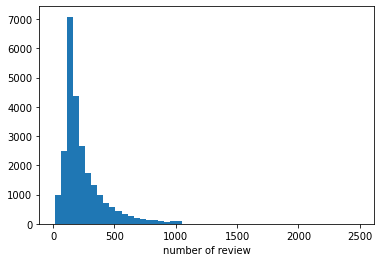

In [6]:
%matplotlib inline
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of review')
plt.xlabel('number of review')

In above graph, it is reasonable that use 1000 size of padding. Remove all review that have 1000 more than words.

In [24]:
max_padding = 1000
X_train = [review for review in X_train if len(review) < max_padding]
X_test = [review for review in X_train if len(review) < max_padding]

In [25]:
max_len = max(len(review) for review in X_train)
print('Max length of review : {}'.format(max_len))
print('Max length of review : {}'.format(min(len(review) for review in X_train)))
print('Max length of review : {:.3f}'.format(sum(map(len, X_train))/len(X_train)))

Max length of review : 999
Max length of review : 11
Max length of review : 234.409


Text(0.5, 0, 'number of review')

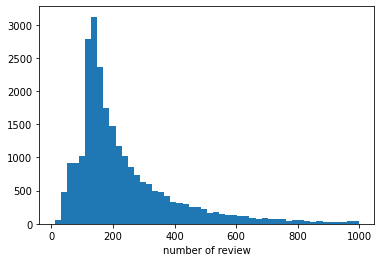

In [26]:
%matplotlib inline
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of review')
plt.xlabel('number of review')